In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

In [2]:
adult_df=pd.read_csv("C:\\Users\\HP\\Desktop\\Datascience\\Internship\\EDA _missingvalues\\adult.csv")

In [3]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
adult_df.shape

(48842, 15)

In [5]:
adult_df=adult_df.replace('?',np.NaN)

In [6]:
#check null values 
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
adult_df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

There are  null values in workclass, occupation and native-country so dropping null values 

In [8]:
adult_df=adult_df.dropna()
adult_df.shape

(45222, 15)

### Data Preprocessing 

In [9]:
adult_df["education"].value_counts()

HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64

In [10]:
edu_map={"HS-grad":"HSE","some-college":"Bachelors","Bachelors":"Bachelors","Masters":"Masters",
        "Assoc-voc":"VHS","11th":"HSE","Assoc-acdm":"VHS","10th":"HighSchool","7th-8th":"Preschool","9th":"Preschool",
        "12th":"HSE","Doctorate":"Doctorate","5th-6th":"Preschool","1st-4th":"Preschool","Preschool":"Preschool"}

In [11]:
adult_df["education"]=adult_df["education"].map(edu_map)

In [12]:
adult_df["education"].isnull().sum()

10684

In [13]:
adult_df['education'].fillna(adult_df['education'].mode()[0], inplace = True)

In [14]:
adult_df["income"].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [15]:
#salary_map={'<=50K':1,'>50K':0}
#adult_df['income']=adult_df['income'].map(salary_map).astype(int)

In [16]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,HSE,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HSE,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,VHS,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,HSE,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,HighSchool,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [17]:
gender_map={"Male":1,"Female":0}
adult_df['gender']=adult_df['gender'].map(gender_map).astype(int)

In [18]:
adult_df['native-country'].value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [19]:
for dataset in adult_df:
    #adult_df.loc[adult_df['native-country'] == 'United-States','native-country'] = 'US'
    adult_df.loc[adult_df['native-country'] != 'United-States','native-country'] ='Non-US'
    

In [20]:
adult_df['marital-status'].value_counts()

Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [21]:
adult_df["marital-status"] = adult_df['marital-status'].replace(['Divorced','Married-spouse-absent','Never-married','Separated','Widowed'],'Single')
adult_df["marital-status"] = adult_df['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse'],'Couple')

In [22]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,HSE,7,Single,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,<=50K
1,38,Private,89814,HSE,9,Couple,Farming-fishing,Husband,White,1,0,0,50,United-States,<=50K
2,28,Local-gov,336951,VHS,12,Couple,Protective-serv,Husband,White,1,0,0,40,United-States,>50K
3,44,Private,160323,HSE,10,Couple,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,>50K
5,34,Private,198693,HighSchool,6,Single,Other-service,Not-in-family,White,1,0,0,30,United-States,<=50K


In [23]:
def f(x):
    if x['workclass'] == 'Federal-gov' or x['workclass']== 'Local-gov' or x['workclass']=='State-gov': return 'govt'
    elif x['workclass'] =='Private':return 'private'
    elif x['workclass'] =='Self-emp-inc' or x['workclass'] =='Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
    
    
adult_df['workclass']=adult_df.apply(f, axis=1)


In [24]:
adult_df["workclass"].value_counts()

private          33307
govt              6452
self_employed     5442
without_pay         21
Name: workclass, dtype: int64

In [25]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,private,226802,HSE,7,Single,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,<=50K
1,38,private,89814,HSE,9,Couple,Farming-fishing,Husband,White,1,0,0,50,United-States,<=50K
2,28,govt,336951,VHS,12,Couple,Protective-serv,Husband,White,1,0,0,40,United-States,>50K
3,44,private,160323,HSE,10,Couple,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,>50K
5,34,private,198693,HighSchool,6,Single,Other-service,Not-in-family,White,1,0,0,30,United-States,<=50K


In [26]:
#adult_df.loc[(adult_df['capital-gain'] > 0),'capital-gain'] = 1
#adult_df.loc[(adult_df['capital-gain'] == 0 ,'capital-gain')]= 0

## EDA

### Univariate Analysis -Numerical columns

#### Age 

<AxesSubplot:xlabel='age'>

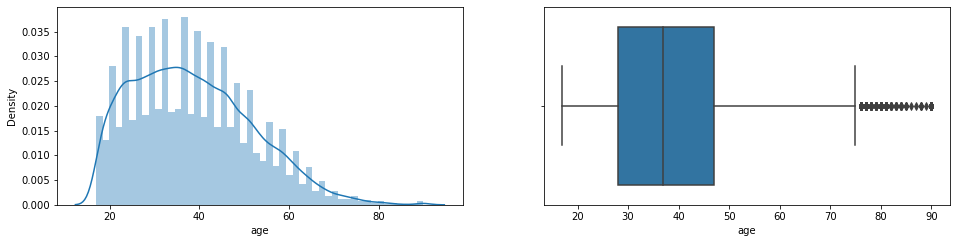

In [27]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(adult_df['age'])
plt.subplot(2,2,2)
sns.boxplot(adult_df['age'])

From the above we can find that there are outlier.The outliers are calculated using IQR and then replaced with median

#### removing outliers

In [28]:
percentile25 = adult_df['age'].quantile(0.25)
percentile75 = adult_df['age'].quantile(0.75)
iqr= percentile75-percentile25 
iqr



19.0

In [29]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [30]:
adult_df['age'] = np.where(
    adult_df['age'] > upper_limit,
    upper_limit,
    np.where(
        adult_df['age'] < lower_limit,
        lower_limit,
        adult_df['age']
    )
)

<AxesSubplot:xlabel='age'>

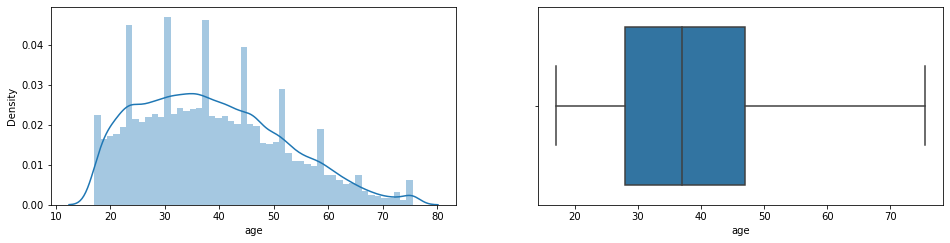

In [31]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)

sns.distplot(adult_df['age'])
plt.subplot(2,2,2)

sns.boxplot(adult_df['age'])

#### fnlwgt

<AxesSubplot:xlabel='fnlwgt'>

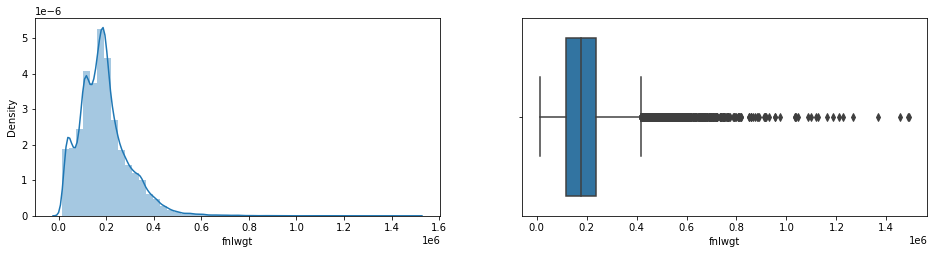

In [32]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(adult_df['fnlwgt'])
plt.subplot(2,2,2)
sns.boxplot(adult_df['fnlwgt'])

From the above we can find that there are outlier.The outliers are calculated using IQR and then replaced with median

In [33]:
percentile25 = adult_df['fnlwgt'].quantile(0.25)
percentile75 = adult_df['fnlwgt'].quantile(0.75)
iqr= percentile75-percentile25 
iqr

120537.75

In [34]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [35]:
adult_df['fnlwgt'] = np.where(
    adult_df['fnlwgt'] > upper_limit,
    upper_limit,
    np.where(
        adult_df['fnlwgt'] < lower_limit,
        lower_limit,
        adult_df['fnlwgt']
    )
)


#### educational-num

<AxesSubplot:xlabel='educational-num'>

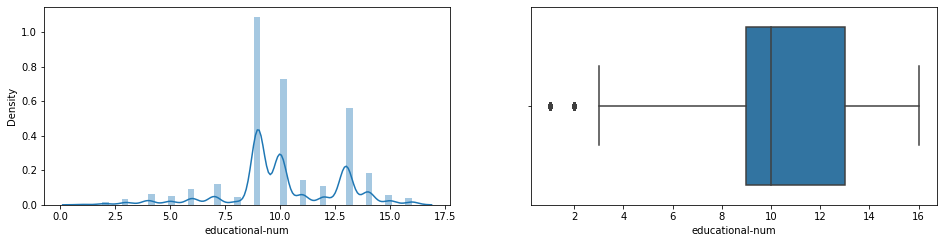

In [36]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(adult_df['educational-num'])
plt.subplot(2,2,2)
sns.boxplot(adult_df['educational-num'])

Few outliers are present and is replaced with median
The distribution is left skewed most of the average number of year of education lies between 4- 10 

#### removing outliers

In [37]:
percentile25 = adult_df['educational-num'].quantile(0.25)
percentile75 = adult_df['educational-num'].quantile(0.75)
iqr= percentile75-percentile25 
iqr


4.0

In [38]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [39]:
adult_df['educational-num'] = np.where(
    adult_df['educational-num'] > upper_limit,
    upper_limit,
    np.where(
        adult_df['educational-num'] < lower_limit,
        lower_limit,
        adult_df['educational-num']
    )
)

<AxesSubplot:title={'center':'Box Plot after median imputation'}, xlabel='educational-num'>

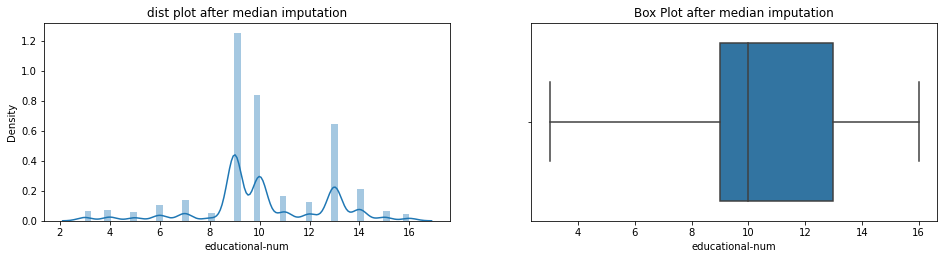

In [40]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.title("dist plot after median imputation")
sns.distplot(adult_df['educational-num'])
plt.subplot(2,2,2)
plt.title("Box Plot after median imputation")
sns.boxplot(adult_df['educational-num'])

### Hours-per-week

<AxesSubplot:xlabel='hours-per-week'>

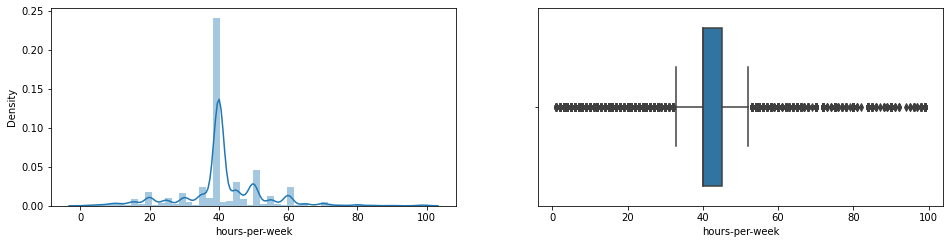

In [41]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(adult_df['hours-per-week'])
plt.subplot(2,2,2)
sns.boxplot(adult_df['hours-per-week'])

Outliers are present its replaced with median 

In [42]:
percentile25 = adult_df['hours-per-week'].quantile(0.25)
percentile75 = adult_df['hours-per-week'].quantile(0.75)
iqr= percentile75-percentile25 
iqr


5.0

In [43]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [44]:
adult_df['hours-per-week'] = np.where(
    adult_df['hours-per-week'] > upper_limit,
    upper_limit,
    np.where(
        adult_df['hours-per-week'] < lower_limit,
        lower_limit,
        adult_df['hours-per-week']
    )
)

<AxesSubplot:xlabel='hours-per-week'>

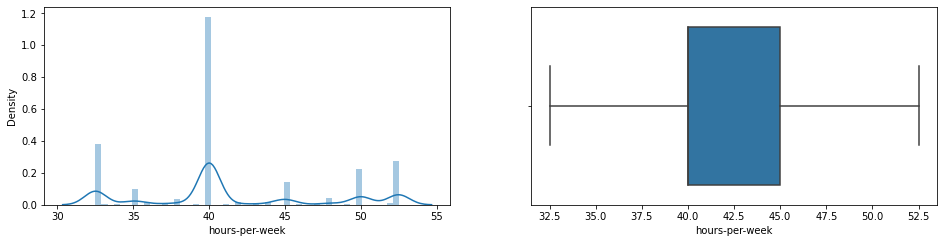

In [45]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(adult_df['hours-per-week'])
plt.subplot(2,2,2)
sns.boxplot(adult_df['hours-per-week'])

### Income

In [46]:
#plt.figure(figsize=(16,8))
#plt.subplot(2,2,1)
#sns.distplot(adult_df['income'])
#plt.subplot(2,2,2)
#sns.boxplot(adult_df['income'])

### Categorical columns

<AxesSubplot:xlabel='workclass', ylabel='count'>

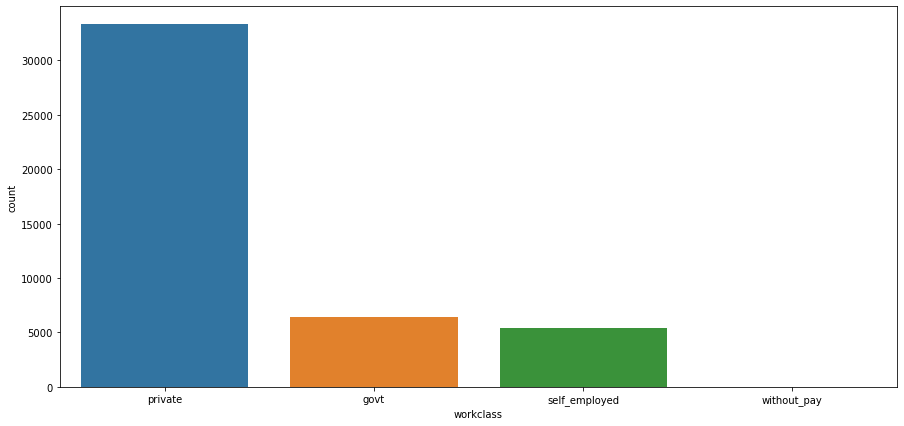

In [47]:
plt.figure(figsize=(15,7))
sns.countplot(adult_df['workclass'])

from the above graph we can observe that most of the people are working in private companies 

In [48]:
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

<AxesSubplot:xlabel='education', ylabel='count'>

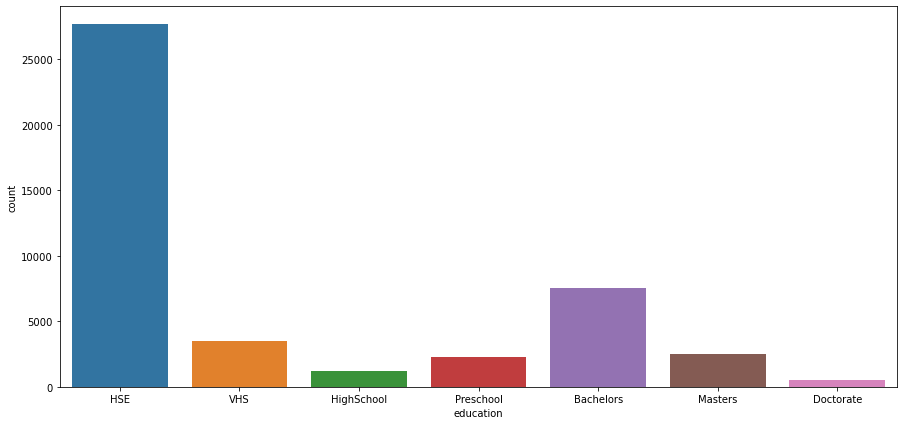

In [49]:
plt.figure(figsize=(15,7))
sns.countplot(adult_df['education'])

From the  above graph we can observe that the majority of the people have completed higher secondary education.


<AxesSubplot:xlabel='marital-status', ylabel='count'>

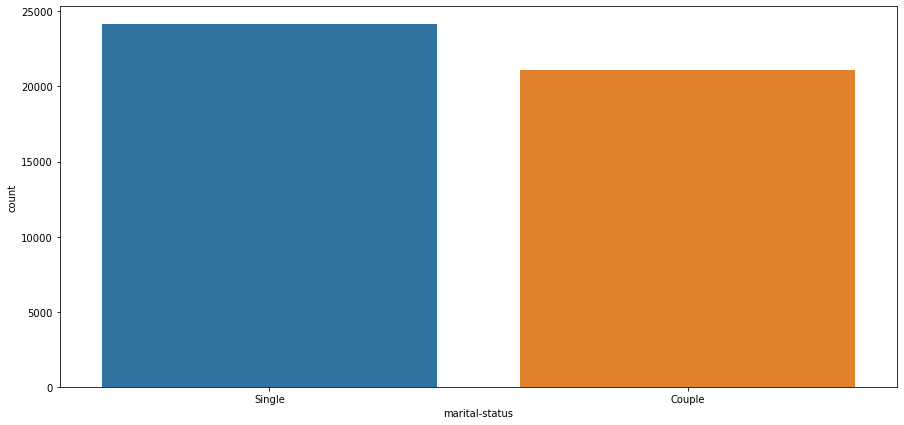

In [50]:
plt.figure(figsize=(15,7))
sns.countplot(adult_df['marital-status'])

Majority of the people are single

<AxesSubplot:xlabel='occupation', ylabel='count'>

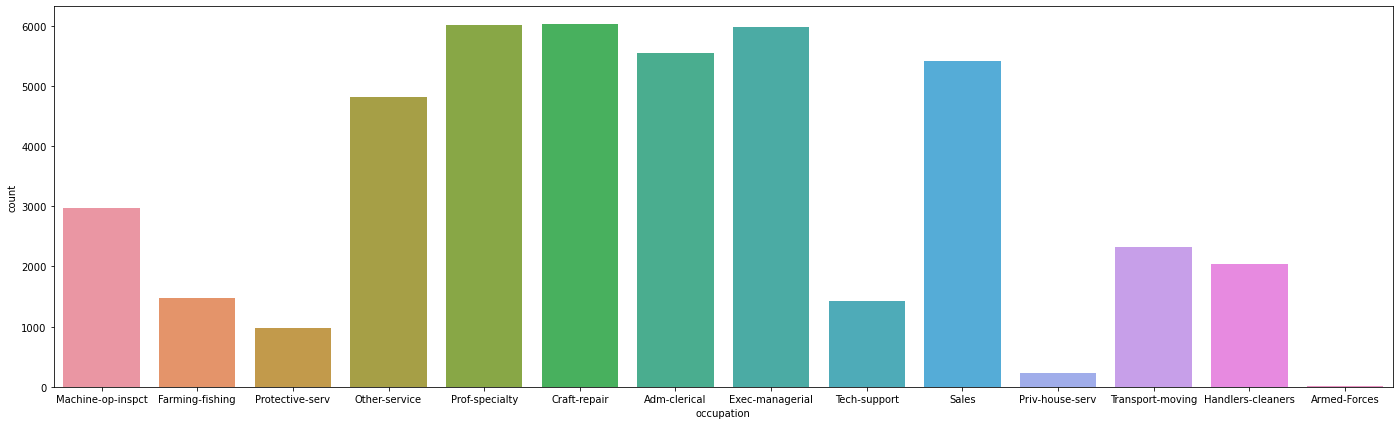

In [51]:
plt.figure(figsize=(24,7))
sns.countplot(adult_df['occupation'])    

Majority of the occupation - prof-speciality,craft-repair,exec-managerial

<AxesSubplot:xlabel='relationship', ylabel='count'>

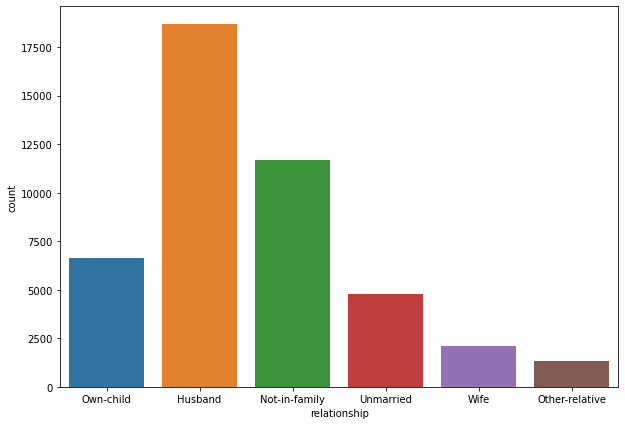

In [52]:
plt.figure(figsize=(10,7))
sns.countplot(adult_df['relationship'])

<AxesSubplot:xlabel='race', ylabel='count'>

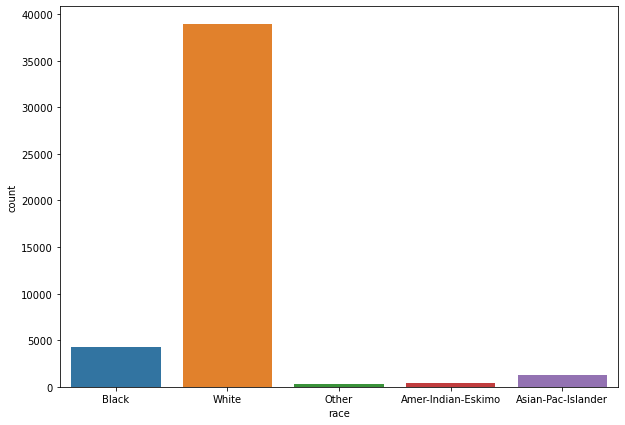

In [53]:
plt.figure(figsize=(10,7))
sns.countplot(adult_df['race'])

Majority of the people are in race white

<AxesSubplot:xlabel='gender', ylabel='count'>

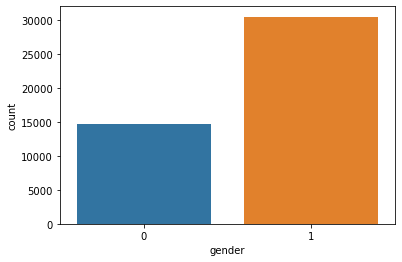

In [54]:
sns.countplot(adult_df['gender'])

Majority are male 

<AxesSubplot:xlabel='native-country', ylabel='count'>

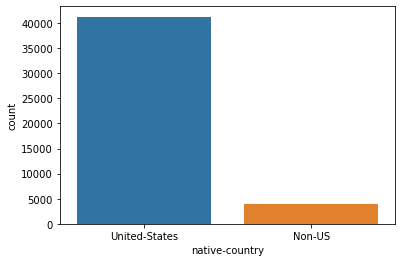

In [55]:
sns.countplot(adult_df['native-country'])

most of the people are from united states 

<AxesSubplot:xlabel='income', ylabel='count'>

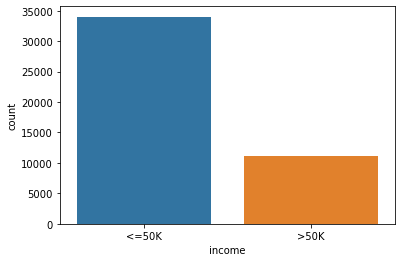

In [56]:
sns.countplot(adult_df['income'])

### Bivariate Analysis

#### Analysis of numerical values with target variable

In [57]:
adult_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,private,226802.0,HSE,7.0,Single,Machine-op-inspct,Own-child,Black,1,0,0,40.0,United-States,<=50K
1,38.0,private,89814.0,HSE,9.0,Couple,Farming-fishing,Husband,White,1,0,0,50.0,United-States,<=50K
2,28.0,govt,336951.0,VHS,12.0,Couple,Protective-serv,Husband,White,1,0,0,40.0,United-States,>50K
3,44.0,private,160323.0,HSE,10.0,Couple,Machine-op-inspct,Husband,Black,1,7688,0,40.0,United-States,>50K
5,34.0,private,198693.0,HighSchool,6.0,Single,Other-service,Not-in-family,White,1,0,0,32.5,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,private,257302.0,VHS,12.0,Couple,Tech-support,Wife,White,0,0,0,38.0,United-States,<=50K
48838,40.0,private,154374.0,HSE,9.0,Couple,Machine-op-inspct,Husband,White,1,0,0,40.0,United-States,>50K
48839,58.0,private,151910.0,HSE,9.0,Single,Adm-clerical,Unmarried,White,0,0,0,40.0,United-States,<=50K
48840,22.0,private,201490.0,HSE,9.0,Single,Adm-clerical,Own-child,White,1,0,0,32.5,United-States,<=50K


<AxesSubplot:xlabel='age', ylabel='income'>

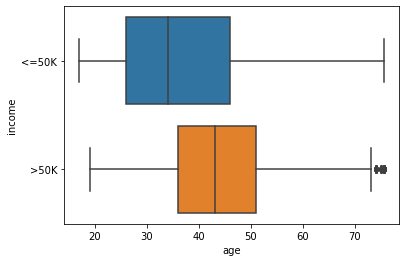

In [58]:
sns.boxplot(x='age',y='income',data=adult_df)

Majority of the people with age  between 25-45 has salary <=50k 

Majority of the people with age between 38-52 has salary >=50k

<AxesSubplot:xlabel='educational-num', ylabel='income'>

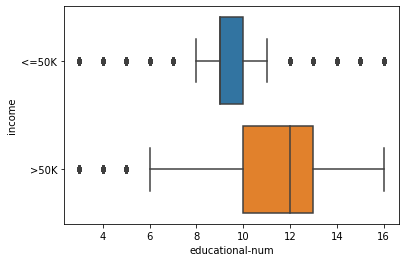

In [59]:
sns.boxplot(x="educational-num",y="income",data=adult_df)

from the above figure we can infer that the people having salary above 50k is having avg 10-12 years of education

the people having salary below 50k have ag 9-10 years of education


<AxesSubplot:xlabel='capital-loss', ylabel='income'>

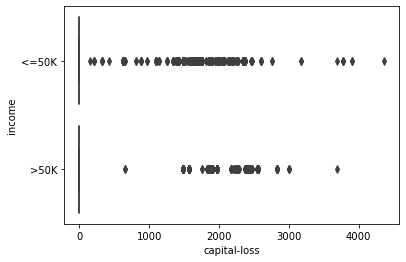

In [60]:
sns.boxplot(x="capital-loss",y="income",data=adult_df)

From the above figure the capital loss for income above 50k is between 1500-3000

the capital loss for income below 50k ia avg between 1200-2500

<AxesSubplot:xlabel='capital-gain', ylabel='income'>

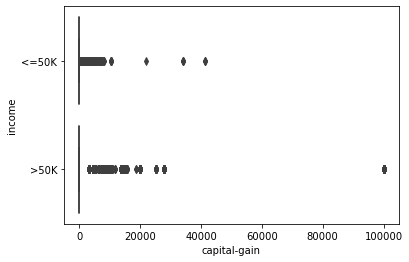

In [61]:
sns.boxplot(x="capital-gain",y="income",data=adult_df)

The capital gain for the income below 50k is mainly between 0-10000

the capital gain for the income above 50k is between 0-20000

In [62]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,private,226802.0,HSE,7.0,Single,Machine-op-inspct,Own-child,Black,1,0,0,40.0,United-States,<=50K
1,38.0,private,89814.0,HSE,9.0,Couple,Farming-fishing,Husband,White,1,0,0,50.0,United-States,<=50K
2,28.0,govt,336951.0,VHS,12.0,Couple,Protective-serv,Husband,White,1,0,0,40.0,United-States,>50K
3,44.0,private,160323.0,HSE,10.0,Couple,Machine-op-inspct,Husband,Black,1,7688,0,40.0,United-States,>50K
5,34.0,private,198693.0,HighSchool,6.0,Single,Other-service,Not-in-family,White,1,0,0,32.5,United-States,<=50K


<AxesSubplot:xlabel='hours-per-week', ylabel='income'>

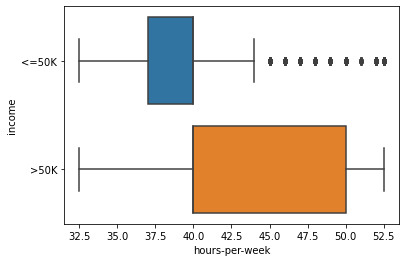

In [63]:
sns.boxplot(x="hours-per-week",y="income",data=adult_df)

 People having income <50k works mainly between 36-40 hrs per week
 
People having income >50k works mainly between 40 - 50 hrs per week 

### Bivariate Analysis of categorical variables with target

<AxesSubplot:xlabel='education', ylabel='count'>

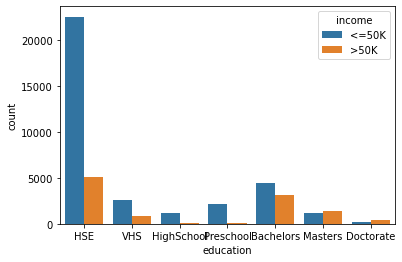

In [64]:
sns.countplot(adult_df["education"],hue=adult_df["income"])

from the above we can infer that people having education HSE is having more income than other people 

<AxesSubplot:xlabel='workclass', ylabel='count'>

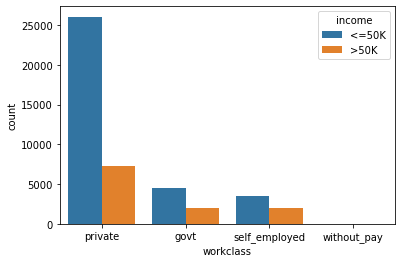

In [65]:
sns.countplot(adult_df["workclass"],hue=adult_df["income"])

The private work class people has more income than other workclass

<AxesSubplot:xlabel='occupation', ylabel='count'>

<Figure size 1800x1200 with 0 Axes>

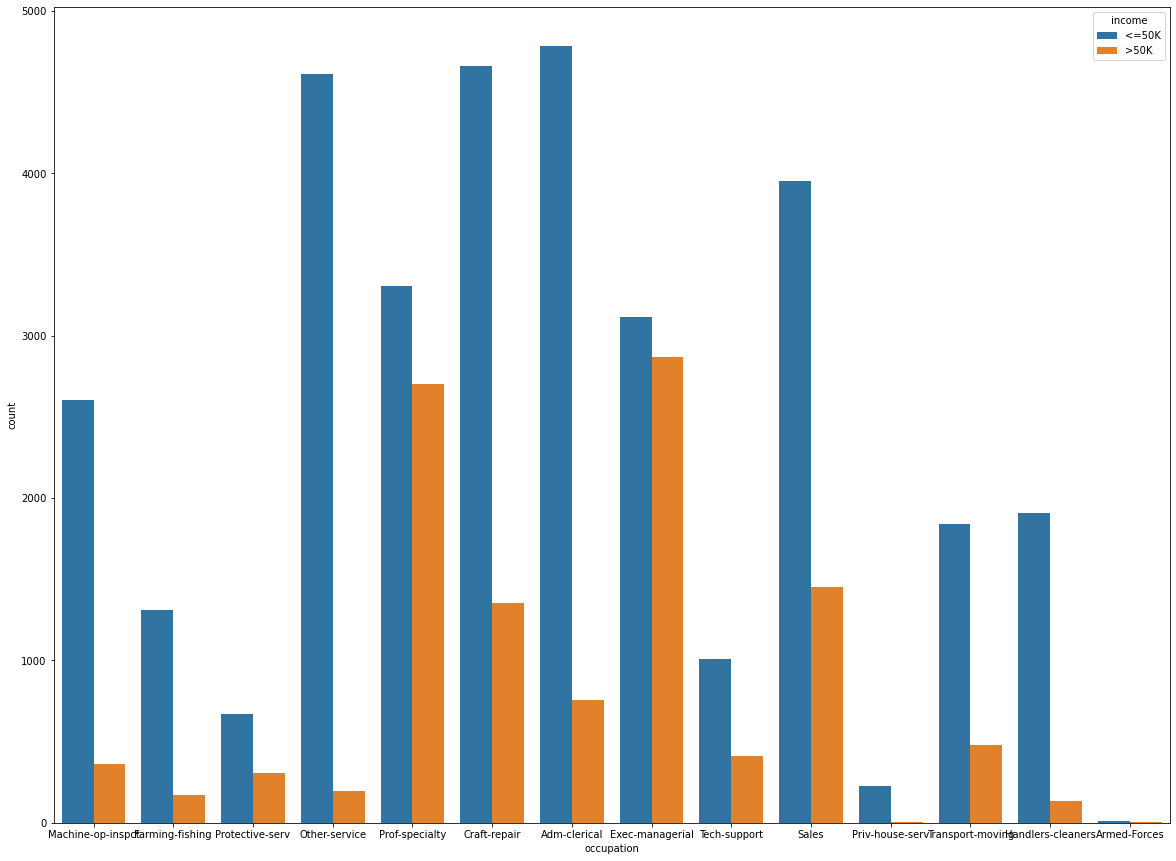

In [66]:
plt.figure(dpi = 300)
plt.figure(figsize=(20,15))
sns.countplot(adult_df["occupation"],hue=adult_df["income"])

Adm- clerical occupation has highest number of people with income <50k

Prof -speciality has highest number of people with income above 50 k



<AxesSubplot:xlabel='race', ylabel='count'>

<Figure size 1800x1200 with 0 Axes>

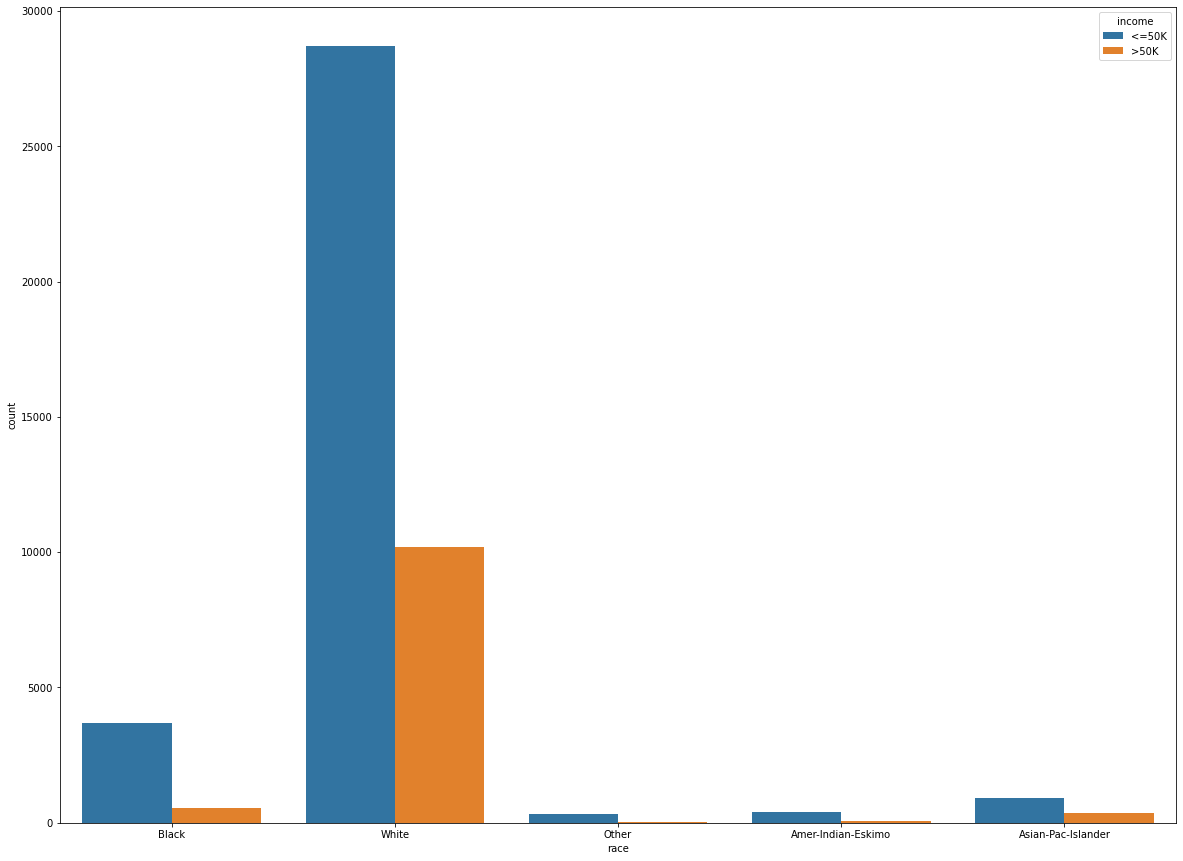

In [67]:
plt.figure(dpi = 300)
plt.figure(figsize=(20,15))
sns.countplot(adult_df["race"],hue=adult_df["income"])

White category  people has highest income than other category

<AxesSubplot:xlabel='native-country', ylabel='count'>

<Figure size 1800x1200 with 0 Axes>

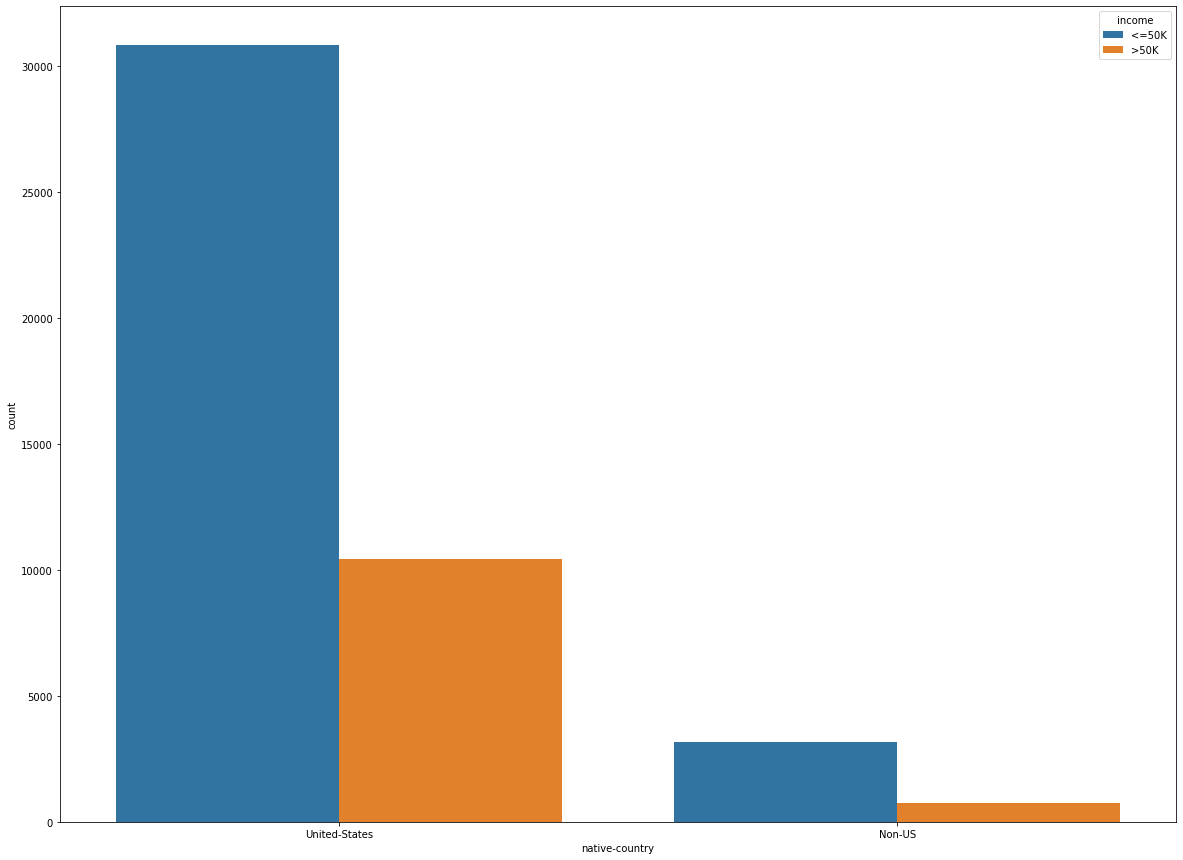

In [68]:
plt.figure(dpi = 300)
plt.figure(figsize=(20,15))
sns.countplot(adult_df["native-country"],hue=adult_df["income"])

US people has highest income than other

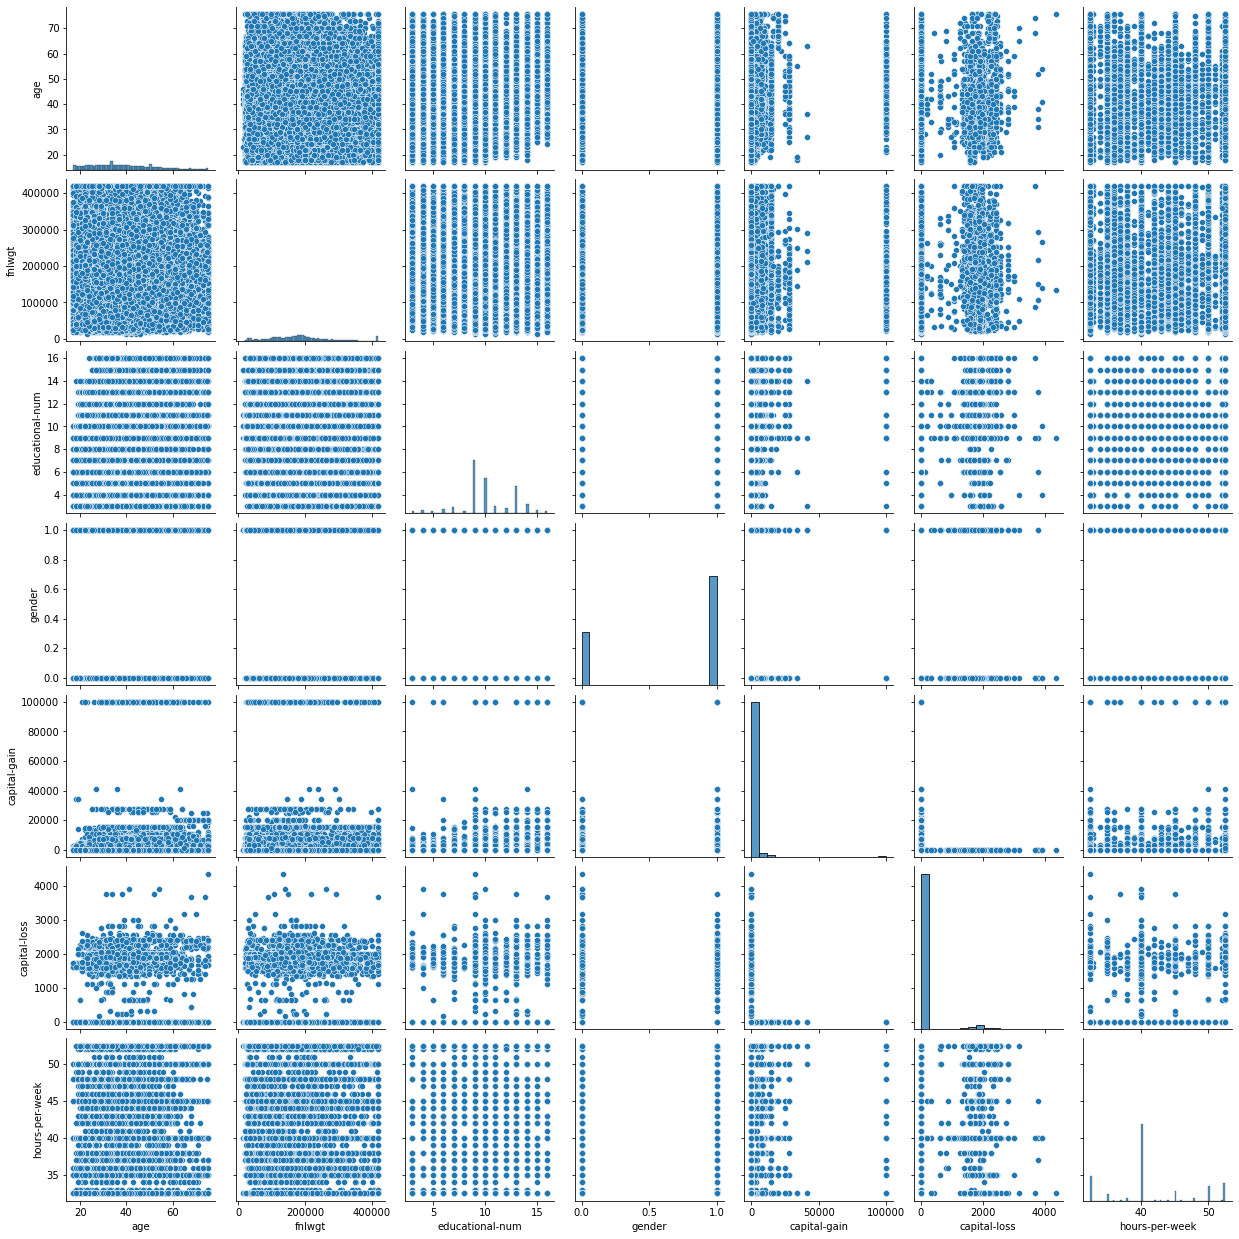

In [69]:
sns.pairplot(adult_df)

we cananot find any corelation between numerical variables 

### Conclusion 

White category people from US working in private organization has more income than other people

people above 40 yrs of age mostly have income >50k

capital gain is high and loss is less for income >50k 



### Feature Transformation

In [70]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,private,226802.0,HSE,7.0,Single,Machine-op-inspct,Own-child,Black,1,0,0,40.0,United-States,<=50K
1,38.0,private,89814.0,HSE,9.0,Couple,Farming-fishing,Husband,White,1,0,0,50.0,United-States,<=50K
2,28.0,govt,336951.0,VHS,12.0,Couple,Protective-serv,Husband,White,1,0,0,40.0,United-States,>50K
3,44.0,private,160323.0,HSE,10.0,Couple,Machine-op-inspct,Husband,Black,1,7688,0,40.0,United-States,>50K
5,34.0,private,198693.0,HighSchool,6.0,Single,Other-service,Not-in-family,White,1,0,0,32.5,United-States,<=50K


In [71]:
target = 'income'
num_columns = adult_df.select_dtypes(['int64','float64']).columns
cat_columns=adult_df.select_dtypes(['object'])
#cat_columns = list(filter(lambda x: x!='income',adult_df.select_dtypes('object').columns))

In [72]:
num_columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

### One Hot Encoding of categorical columns

In [73]:
cat_columns.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'native-country', 'income'],
      dtype='object')

In [74]:
from sklearn.preprocessing import LabelEncoder 
encode=LabelEncoder()
for x in cat_columns:
    adult_df[x]=encode.fit_transform (adult_df[x])

In [75]:
adult_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,1,226802.0,2,7.0,1,6,3,2,1,0,0,40.0,1,0
1,38.0,1,89814.0,2,9.0,0,4,0,4,1,0,0,50.0,1,0
2,28.0,0,336951.0,6,12.0,0,10,0,4,1,0,0,40.0,1,1
3,44.0,1,160323.0,2,10.0,0,6,0,2,1,7688,0,40.0,1,1
5,34.0,1,198693.0,3,6.0,1,7,1,4,1,0,0,32.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,1,257302.0,6,12.0,0,12,5,4,0,0,0,38.0,1,0
48838,40.0,1,154374.0,2,9.0,0,6,0,4,1,0,0,40.0,1,1
48839,58.0,1,151910.0,2,9.0,1,0,4,4,0,0,0,40.0,1,0
48840,22.0,1,201490.0,2,9.0,1,0,3,4,1,0,0,32.5,1,0


### Standard scaling Numerical Data

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
adult_df[num_columns] = sc.fit_transform(adult_df[num_columns])

In [77]:
adult_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-1.030720,1,0.418632,2,-1.236798,1,6,3,2,1,-0.146733,-0.21878,-0.230674,1,0
1,-0.039252,1,-1.017386,2,-0.445641,0,4,0,4,1,-0.146733,-0.21878,1.396673,1,0
2,-0.801919,0,1.573301,6,0.741096,0,10,0,4,1,-0.146733,-0.21878,-0.230674,1,1
3,0.418348,1,-0.278254,2,-0.050062,0,6,0,2,1,0.877467,-0.21878,-0.230674,1,1
5,-0.344319,1,0.123971,3,-1.632377,1,7,1,4,1,-0.146733,-0.21878,-1.451185,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.878186,1,0.738357,6,0.741096,0,12,5,4,0,-0.146733,-0.21878,-0.556144,1,0
48838,0.113281,1,-0.340616,2,-0.445641,0,6,0,4,1,-0.146733,-0.21878,-0.230674,1,1
48839,1.486082,1,-0.366446,2,-0.445641,1,0,4,4,0,-0.146733,-0.21878,-0.230674,1,0
48840,-1.259520,1,0.153291,2,-0.445641,1,0,3,4,1,-0.146733,-0.21878,-1.451185,1,0


### Feature Selection

#### Categorical column selection-Chi Square test

In [78]:
X = adult_df.drop('income',axis=1)
Y = adult_df['income']

In [79]:
cat_columns =X[['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'native-country']]
Y= Y.to_frame()

In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [81]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(cat_columns, Y)
cat_columns_fs = fs.transform(cat_columns)
fs.scores_


array([   6.46335183,  377.00930455, 4209.07952183,  304.41759475,
       5243.78807188,   42.72482656,    5.95091989])

In [82]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 6.463352
Feature 1: 377.009305
Feature 2: 4209.079522
Feature 3: 304.417595
Feature 4: 5243.788072
Feature 5: 42.724827
Feature 6: 5.950920


Features with highest scores are selected 

education,marital status ,occupation,relationship,race are the features with highest score they are used for model building

workclass and native country columns are removed 

In [83]:
adult_df.drop(["workclass","native-country"],axis=1,inplace=True)

#### Numerical column selection-RFE

In [84]:
from sklearn.feature_selection import RFE

In [85]:
num_columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
num_columns=X[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week' ]]
model=LogisticRegression()
rfe=RFE(model,n_features_to_select=5)
rfe_fit= rfe.fit(num_columns,Y)


In [87]:
print("num of Features", rfe_fit.n_features_)
print("selected Features", rfe_fit.support_)
print("feature Rank",rfe_fit.ranking_)

num of Features 5
selected Features [ True False  True  True  True  True]
feature Rank [1 2 1 1 1 1]


The column fnlwgt has highest score it is dropped 

In [88]:
adult_df.drop("fnlwgt",axis=1,inplace=True)

### Handling Imbalance Dataset

In [89]:
X = adult_df.drop('income',axis=1)
Y = adult_df['income']

In [90]:
 #! pip install imblearn
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X,Y = ros.fit_resample(X,Y)

In [91]:
print(Counter(Y))

Counter({0: 34014, 1: 34014})


In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [93]:
adult_df.shape

(45222, 12)

In [94]:
adult_df["income"].value_counts()

0    34014
1    11208
Name: income, dtype: int64

### Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train)
Y_train_logistic = LR.predict(X_train)



In [96]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(Y_train, Y_train_logistic))
print(accuracy_score(Y_train, Y_train_logistic))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80     27218
           1       0.80      0.83      0.81     27204

    accuracy                           0.81     54422
   macro avg       0.81      0.81      0.81     54422
weighted avg       0.81      0.81      0.81     54422

0.8089926867810812


In [97]:
LR.fit(X_test,Y_test)
Y_test_logistic=LR.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(Y_test, Y_test_logistic))
print(accuracy_score(Y_test, Y_test_logistic))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      6796
           1       0.80      0.84      0.82      6810

    accuracy                           0.81     13606
   macro avg       0.81      0.81      0.81     13606
weighted avg       0.81      0.81      0.81     13606

0.8119947082169631


We got accuracy for test and train  81%


### Naive Bayes

In [99]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_train_nb = nb.predict(X_train)

In [100]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(Y_train, Y_train_nb))
print(accuracy_score(Y_train, Y_train_nb))

              precision    recall  f1-score   support

           0       0.66      0.91      0.77     27218
           1       0.86      0.53      0.65     27204

    accuracy                           0.72     54422
   macro avg       0.76      0.72      0.71     54422
weighted avg       0.76      0.72      0.71     54422

0.7201499393627577


In [101]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_test,Y_test)
Y_test_nb = nb.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(Y_test, Y_test_nb))
print(accuracy_score(Y_test, Y_test_nb))

              precision    recall  f1-score   support

           0       0.64      0.92      0.75      6796
           1       0.86      0.48      0.62      6810

    accuracy                           0.70     13606
   macro avg       0.75      0.70      0.68     13606
weighted avg       0.75      0.70      0.68     13606

0.7000587975892988


we got test and train accuracy 71 and 70%

In [103]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
Y_train_dtree = tree.predict(X_train)

In [104]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(Y_train, Y_train_dtree))
print(accuracy_score(Y_train, Y_train_dtree))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     27218
           1       0.93      0.97      0.95     27204

    accuracy                           0.95     54422
   macro avg       0.95      0.95      0.95     54422
weighted avg       0.95      0.95      0.95     54422

0.9507919591341737


In [105]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
Y_test_dtree = tree.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(Y_test, Y_test_dtree))
print(accuracy_score(Y_test, Y_test_dtree))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      6796
           1       0.86      0.93      0.89      6810

    accuracy                           0.89     13606
   macro avg       0.89      0.89      0.89     13606
weighted avg       0.89      0.89      0.89     13606

0.8888725562251948


We got test accuracy as 95% and train accuracy AS 88% hich shows overfitting of the model

### Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='gini')
rf.fit(X_train,Y_train)
Y_train_rf = rf.predict(X_train)

In [108]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(Y_train, Y_train_rf))
print(accuracy_score(Y_train, Y_train_rf))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     27218
           1       0.93      0.98      0.95     27204

    accuracy                           0.95     54422
   macro avg       0.95      0.95      0.95     54422
weighted avg       0.95      0.95      0.95     54422

0.9507735842122671


In [109]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='gini')
rf.fit(X_train,Y_train)
Y_test_rf = rf.predict(X_test)

In [110]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(Y_test, Y_test_rf))
print(accuracy_score(Y_test, Y_test_rf))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      6796
           1       0.86      0.95      0.90      6810

    accuracy                           0.90     13606
   macro avg       0.90      0.90      0.90     13606
weighted avg       0.90      0.90      0.90     13606

0.8987211524327503


we got train accuracy as 95% and test accuracy as 90% which shows overfitting of data 

### Gradient boosting Algorithm

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train,Y_train)
Y_train_gbt = gbm.predict(X_train)

In [112]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(Y_train, Y_train_gbt))
print(accuracy_score(Y_train, Y_train_gbt))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83     27218
           1       0.82      0.86      0.84     27204

    accuracy                           0.84     54422
   macro avg       0.84      0.84      0.84     54422
weighted avg       0.84      0.84      0.84     54422

0.8377494395648819


In [113]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train,Y_train)
Y_test_gbt = gbm.predict(X_test)

In [114]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(Y_test, Y_test_gbt))
print(accuracy_score(Y_test, Y_test_gbt))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      6796
           1       0.82      0.86      0.84      6810

    accuracy                           0.84     13606
   macro avg       0.84      0.84      0.84     13606
weighted avg       0.84      0.84      0.84     13606

0.8363222107893576


we got train  accuracy 83% and test accuracy 84%

### XG Boost

In [115]:
#!pip install Xgboost
from xgboost.sklearn import XGBClassifier
xgb = GradientBoostingClassifier()
xgb.fit(X_train,Y_train)
Y_train_xgb = xgb.predict(X_train)

In [116]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(Y_train, Y_train_xgb))
print(accuracy_score(Y_train, Y_train_xgb))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83     27218
           1       0.82      0.86      0.84     27204

    accuracy                           0.84     54422
   macro avg       0.84      0.84      0.84     54422
weighted avg       0.84      0.84      0.84     54422

0.8377494395648819


In [117]:
from xgboost.sklearn import XGBClassifier
xgb = GradientBoostingClassifier()
xgb.fit(X_train,Y_train)
Y_test_xgb = xgb.predict(X_test)

In [118]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(Y_test, Y_test_xgb))
print(accuracy_score(Y_test, Y_test_xgb))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      6796
           1       0.82      0.86      0.84      6810

    accuracy                           0.84     13606
   macro avg       0.84      0.84      0.84     13606
weighted avg       0.84      0.84      0.84     13606

0.8363222107893576


We got train accuracy as 83% and test acuracy as 84%

### ADA Boost

In [119]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,Y_train)
Y_train_abc = abc.predict(X_train)

In [120]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(Y_train, Y_train_abc))
print(accuracy_score(Y_train, Y_train_abc))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82     27218
           1       0.81      0.85      0.83     27204

    accuracy                           0.83     54422
   macro avg       0.83      0.83      0.83     54422
weighted avg       0.83      0.83      0.83     54422

0.827808606813421


In [121]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,Y_train)
Y_test_abc = abc.predict(X_test)

In [122]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(Y_test, Y_test_abc))
print(accuracy_score(Y_test, Y_test_abc))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      6796
           1       0.81      0.86      0.83      6810

    accuracy                           0.83     13606
   macro avg       0.83      0.83      0.83     13606
weighted avg       0.83      0.83      0.83     13606

0.8273555784212847


We got train accuracy 83% and test accuracy as 83%

### KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_train_knn  = knn.predict(X_train)

In [124]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(Y_train, Y_train_knn))
print(accuracy_score(Y_train, Y_train_knn))

              precision    recall  f1-score   support

           0       0.93      0.82      0.88     27218
           1       0.84      0.94      0.89     27204

    accuracy                           0.88     54422
   macro avg       0.89      0.88      0.88     54422
weighted avg       0.89      0.88      0.88     54422

0.882657748704568


In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_test_knn  = knn.predict(X_test)

In [126]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(Y_test, Y_test_knn))
print(accuracy_score(Y_test, Y_test_knn))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      6796
           1       0.80      0.90      0.85      6810

    accuracy                           0.84     13606
   macro avg       0.84      0.84      0.84     13606
weighted avg       0.84      0.84      0.84     13606

0.8372041746288402


We got train accuracy 88 % and test accuracy 83%

In [133]:
print('Logistic Regression')
print('Train')
print('Accuracy =>',accuracy_score(Y_train,Y_train_logistic))
print('Confusion matrix =>\n',confusion_matrix(Y_train,Y_train_logistic))
print()
print('Test')
print('Accuracy =>',accuracy_score(Y_test,Y_test_logistic))
print('Confusion matrix =>\n',confusion_matrix(Y_test,Y_test_logistic))
print()
print()
print('Naive Bayes')
print('Train')
print('Accuracy =>',accuracy_score(Y_train,Y_train_nb))
print('Confusion matrix =>\n',confusion_matrix(Y_train,Y_train_nb))
print()
print('Test')
print('Accuracy =>',accuracy_score(Y_test,Y_test_nb))
print('Confusion matrix =>\n',confusion_matrix(Y_test,Y_test_nb))
print()
print()
print('Decision Tree')
print('Train')
print('Accuracy =>',accuracy_score(Y_train,Y_train_dtree))
print('Confusion matrix =>\n',confusion_matrix(Y_train,Y_train_dtree))
print()
print('Test')
print('Accuracy =>',accuracy_score(Y_test,Y_test_dtree))
print('Confusion matrix =>\n',confusion_matrix(Y_test,Y_test_dtree))
print()
print()
print('Random Forest')
print('Train')
print('Accuracy =>',accuracy_score(Y_train,Y_train_rf))
print('Confusion matrix =>\n',confusion_matrix(Y_train,Y_train_rf))
print()
print('Test')
print('Accuracy =>',accuracy_score(Y_test,Y_test_rf))
print('Confusion matrix =>\n',confusion_matrix(Y_test,Y_test_rf))
print()
print()
print('GBT')
print('Train')
print('Accuracy =>',accuracy_score(Y_train,Y_train_gbt))
print('Confusion matrix =>\n',confusion_matrix(Y_train,Y_train_gbt))
print()
print('Test')
print('Accuracy =>',accuracy_score(Y_test,Y_test_gbt))
print('Confusion matrix =>\n',confusion_matrix(Y_test,Y_test_gbt))
print()
print()
print('Ada Boost')
print('Train')
print('Accuracy =>',accuracy_score(Y_train,Y_train_abc))
print('Confusion matrix =>\n',confusion_matrix(Y_train,Y_train_abc))
print()
print('Test')
print('Accuracy =>',accuracy_score(Y_test,Y_test_abc))
print('Confusion matrix =>\n',confusion_matrix(Y_test,Y_test_abc))
print()
print()
print('XGBoost')
print('Train')
print('Accuracy =>',accuracy_score(Y_train,Y_train_xgb))
print('Confusion matrix =>\n',confusion_matrix(Y_train,Y_train_xgb))
print()
print('Test')
print('Accuracy =>',accuracy_score(Y_test,Y_test_xgb))
print('Confusion matrix =>\n',confusion_matrix(Y_test,Y_test_xgb))
print()
print()
print('KNN')
print('Train')
print('Accuracy =>',accuracy_score(Y_train,Y_train_knn))
print('Confusion matrix =>\n',confusion_matrix(Y_train,Y_train_knn))
print()
print('Test')
print('Accuracy =>',accuracy_score(Y_test,Y_test_knn))
print('Confusion matrix =>\n',confusion_matrix(Y_test,Y_test_knn))

Logistic Regression
Train
Accuracy => 0.8089926867810812
Confusion matrix =>
 [[21389  5829]
 [ 4566 22638]]

Test
Accuracy => 0.8119947082169631
Confusion matrix =>
 [[5329 1467]
 [1091 5719]]


Naive Bayes
Train
Accuracy => 0.7201499393627577
Confusion matrix =>
 [[24877  2341]
 [12889 14315]]

Test
Accuracy => 0.7000587975892988
Confusion matrix =>
 [[6265  531]
 [3550 3260]]


Decision Tree
Train
Accuracy => 0.9507919591341737
Confusion matrix =>
 [[25355  1863]
 [  815 26389]]

Test
Accuracy => 0.8888725562251948
Confusion matrix =>
 [[5731 1065]
 [ 447 6363]]


Random Forest
Train
Accuracy => 0.9507735842122671
Confusion matrix =>
 [[25167  2051]
 [  628 26576]]

Test
Accuracy => 0.8987211524327503
Confusion matrix =>
 [[5788 1008]
 [ 370 6440]]


GBT
Train
Accuracy => 0.8377494395648819
Confusion matrix =>
 [[22094  5124]
 [ 3706 23498]]

Test
Accuracy => 0.8363222107893576
Confusion matrix =>
 [[5489 1307]
 [ 920 5890]]


Ada Boost
Train
Accuracy => 0.827808606813421
Confusion 

### `Conclusion:XG Boost works best in prediction of the salary with 83.7% of test and train accuracy`